[View in Colaboratory](https://colab.research.google.com/github/rajaswa/Google_Collaboratory_Projects/blob/master/CIFAR_10.ipynb)

In [127]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz  && tar -xvf cifar-10-python.tar.gz

--2018-08-02 12:43:37--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.2’

cifar-10-python.tar 100%[===================>] 162.60M  9.04MB/s    in 18s     

2018-08-02 12:43:55 (9.02 MB/s) - ‘cifar-10-python.tar.gz.2’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [128]:
!ls -R

.:
cifar-10-batches-py	cifar-10-python.tar.gz.1  datalab
cifar-10-python.tar.gz	cifar-10-python.tar.gz.2

./cifar-10-batches-py:
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch

./datalab:


In [0]:
#Extracting pickled data function
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
#extracting dictionaries

#extracting the train data 
batch1_dict = unpickle("cifar-10-batches-py/data_batch_1")
batch2_dict = unpickle("cifar-10-batches-py/data_batch_2")
batch3_dict = unpickle("cifar-10-batches-py/data_batch_3")
batch4_dict = unpickle("cifar-10-batches-py/data_batch_4")
batch5_dict = unpickle("cifar-10-batches-py/data_batch_5")

#extracting the test data
test_dict = unpickle("cifar-10-batches-py/test_batch")

#extracting the meta data
meta_dict = unpickle("cifar-10-batches-py/batches.meta")


In [131]:
#Checking keys of all the dataset dictionaries

#batch1_dict.keys()
test_dict.keys()
#meta_dict.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [0]:
#separating pixel feature data and label data into lists

#pixel feature data
xbatch_1 = batch1_dict[b'data']
xbatch_2 = batch2_dict[b'data']
xbatch_3 = batch3_dict[b'data']
xbatch_4 = batch4_dict[b'data']
xbatch_5 = batch5_dict[b'data']

xtest = test_dict[b'data']

#label data
ybatch_1 = batch1_dict[b'labels']
ybatch_2 = batch2_dict[b'labels']
ybatch_3 = batch3_dict[b'labels']
ybatch_4 = batch4_dict[b'labels']
ybatch_5 = batch5_dict[b'labels']

ytest = test_dict[b'labels']

In [0]:
'''INSTALLING PYTORCH'''


# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch


In [0]:
'''IMPORTS'''

import numpy as np

import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from __future__ import print_function, division
import os
import torch
import torch.nn as nn
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch.autograd import Variable

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

import torch.utils.data as utils

In [0]:
#Converting everything into numpy arrays

xbatch1 = np.array(xbatch_1)
xbatch2 = np.array(xbatch_2)
xbatch3 = np.array(xbatch_3)
xbatch4 = np.array(xbatch_4)
xbatch5 = np.array(xbatch_5)

x_test = np.array(xtest)

ybatch1 = np.array(ybatch_1)
ybatch2 = np.array(ybatch_2)
ybatch3 = np.array(ybatch_3)
ybatch4 = np.array(ybatch_4)
ybatch5 = np.array(ybatch_5)

y_test = np.array(ytest)

In [0]:
#creating train dataset list and validation dataset list

#TRAIN : batch1+ batch2 + batch3 + batch4
x_train = np.concatenate((xbatch1, xbatch2, xbatch3, xbatch4))
y_train = np.concatenate((ybatch1, ybatch2, ybatch3, ybatch4))
 
#VALID : batch5

x_valid = xbatch5
y_valid = ybatch5

In [137]:
#Getting clarity on initial dimesnions

np.shape(x_train)
#np.shape(x_valid)
#np.shape(x_test)

#np.shape(y_train)
#np.shape(y_valid)
#np.shape(y_test)

(40000, 3072)

In [0]:
#dataset reshape function  ex : 40000*3072 --> 40000*32*32*3 RGB

def image_reshape(dataset):
  new_reshaped = []
  for i in range (np.shape(dataset)[0]):
    r = dataset[i][:1024]
    g = dataset[i][1024:2048]
    b = dataset[i][2048:3072]
    r = np.reshape(r,(32, 32))
    g = np.reshape(g,(32, 32))
    b = np.reshape(b,(32, 32))
    rgb = np.dstack((r,g,b))
    new_reshaped.append(rgb)
    
  new_reshaped = np.array(new_reshaped)
  return new_reshaped

In [0]:
#reshaping the feature data

x_train = image_reshape(x_train)
x_test = image_reshape(x_test)
x_valid = image_reshape(x_valid)

In [0]:
#creating duplicate samples

x_train2 = np.fliplr(x_train)
x_train2 = np.rot90(x_train2, k=2, axes=(1,2))

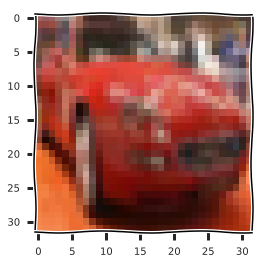

In [141]:
#visualizing original data samples

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#imgplot = plt.imshow(x_train[random.randint(0,40000)])
imgplot = plt.imshow(x_train[5])

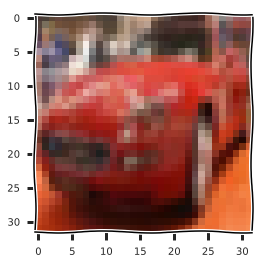

In [142]:
#visualizing duplicate data samples

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#imgplot = plt.imshow(x_train[random.randint(0,40000)])
imgplot = plt.imshow(x_train2[5])

In [0]:
x_train = np.concatenate((x_train, x_train2))
y_train = np.concatenate((y_train, y_train))

In [144]:
#checking reshaped dimensions dimesnions

np.shape(x_train)
#np.shape(x_valid)
#np.shape(x_test)

#np.shape(y_train)
#np.shape(y_valid)
#np.shape(y_test)

(80000, 32, 32, 3)

In [0]:
#Taking transpose to match the argument syntax for pytorch       i.e 32*32*3 --> 3*32*32

x_train = x_train.transpose((0, 3, 1, 2))
x_test = x_test.transpose((0, 3, 1, 2))
x_valid = x_valid.transpose((0, 3, 1, 2))

In [0]:
#preprocessing functions

def normalize(x):
    return (x.astype(float) - 32) / 32

In [0]:
#preprocessing feature data

xtrain_norm = normalize(x_train)
xtest_norm = normalize(x_test)
xvalid_norm = normalize(x_valid)

In [0]:
#converting to torch tensors

xtrainTensor = torch.from_numpy(xtrain_norm)
xtestTensor = torch.from_numpy(xtest_norm)
xvalidTensor = torch.from_numpy(xvalid_norm)

ytrainTensor = torch.from_numpy(y_train).long()
ytestTensor = torch.from_numpy(y_test).long()
yvalidTensor = torch.from_numpy(y_valid).long()

In [0]:
#creating tensor datasets

train_dataset = utils.TensorDataset(xtrainTensor, ytrainTensor) 
test_dataset = utils.TensorDataset(xtestTensor, ytestTensor)
valid_dataset = utils.TensorDataset(xvalidTensor, yvalidTensor)

In [0]:
#creating loaders

batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


In [0]:
#deciding the number of epochs

n_iters = 2048
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs = 6

In [0]:
#Making the model class

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        #Convolution 1
        self.cnn1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.relu1 = nn.ReLU()
        self.norm1 = nn.BatchNorm2d(16)
        
        #maxpool1
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        
        
        #convolution2
        self.cnn2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.relu2 = nn.ReLU()
        self.norm2 = nn.BatchNorm2d(32)
        
        #maxpool2
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        
        #convolution3
        self.cnn3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.relu3 = nn.ReLU()
        self.norm3 = nn.BatchNorm2d(64)
        
        #maxpool3
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2)
        
        
        #FC layer
        self.fc1 = nn.Linear(64*4*4, 64*4*4)
        
        #relu3
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64*4*4, 10)
        
        self.norm1d = nn.BatchNorm1d(64*4*4)
        self.normfc = nn.BatchNorm1d(10)
        
    def forward(self, x):
        #cnn1
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.norm1(out)
        
        #maxpool1
        out = self.maxpool1(out)
        m = nn.Dropout2d(p=0.2)
        out = m(out)
        
        #cnn2
        out = self.cnn2(out)    
        out = self.relu2(out)
        out = self.norm2(out)
        
        #maxpool2
        out = self.maxpool2(out)
        m = nn.Dropout2d(p=0.2)
        out = m(out)
        
        #cnn3
        out = self.cnn3(out)    
        out = self.relu3(out)
        out = self.norm3(out)
        
        #maxpool3
        out = self.maxpool3(out)
        m = nn.Dropout2d(p=0.2)
        out = m(out)
        #resize 
        out = out.view(out.size(0), -1)
        
        #linear function (readout)
        out = self.fc1(out)        
        out = self.relu3(out)
        out = self.norm1d(out)
        
        out = self.fc1(out)        
        out = self.relu3(out)
        out = self.norm1d(out)
        
        
        out = self.fc2(out)
        
        
        return out

In [0]:
#Making the model class

class DeeperModel(nn.Module):
    def __init__(self):
        super(DeeperModel, self).__init__()
        
        #Convolution 1
        self.cnn1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.relu1 = nn.ReLU()
        self.norm1 = nn.BatchNorm2d(16)
        
        #maxpool1
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        
        
        #convolution2
        self.cnn2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.relu2 = nn.ReLU()
        self.norm2 = nn.BatchNorm2d(32)
        
        #maxpool2
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        
        #convolution3
        self.cnn3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.relu3 = nn.ReLU()
        self.norm3 = nn.BatchNorm2d(64)
        
        #maxpool3
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2)
        
        #convolution4
        self.cnn4 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        self.relu4 = nn.ReLU()
        self.norm4 = nn.BatchNorm2d(128)
        
        #maxpool4
        self.maxpool4 = nn.MaxPool2d(kernel_size = 2)
        
        #convolution5
        self.cnn5 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        self.relu5 = nn.ReLU()
        self.norm5 = nn.BatchNorm2d(256)
        
        
        #FC layer
        self.fc1 = nn.Linear(256*1*1, 256*1*1)
        
        #relu3
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256*1*1, 10)
        
        self.norm1d = nn.BatchNorm1d(256*1*1)
        self.normfc = nn.BatchNorm1d(10)
        
    def forward(self, x):
        #cnn1
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.norm1(out)
        
        #maxpool1
        out = self.maxpool1(out)
        m = nn.Dropout2d(p=0.2)
        out = m(out)
        
        #cnn2
        out = self.cnn2(out)    
        out = self.relu2(out)
        out = self.norm2(out)
        
        #maxpool2
        out = self.maxpool2(out)
        m = nn.Dropout2d(p=0.2)
        out = m(out)
        
        #cnn3
        out = self.cnn3(out)    
        out = self.relu3(out)
        out = self.norm3(out)
        
        #maxpool4
        out = self.maxpool3(out)
        m = nn.Dropout2d(p=0.1)
        out = m(out)
        
        #cnn4
        out = self.cnn4(out)    
        out = self.relu4(out)
        out = self.norm4(out)
        
        #maxpool4
        out = self.maxpool4(out)
        m = nn.Dropout2d(p=0.1)
        out = m(out)
        
        #cnn5
        out = self.cnn5(out)    
        out = self.relu5(out)
        out = self.norm5(out)
        
        #maxpool4
        out = self.maxpool4(out)
        m = nn.Dropout2d(p=0.1)
        out = m(out)
      
        
        #resize 
        out = out.view(out.size(0), -1)
        
        #linear function (readout)
        out = self.fc1(out)        
        out = self.relu3(out)
        out = self.norm1d(out)
       
              
        out = self.fc2(out)
        out = self.normfc(out)
        
        return out

In [0]:
#Instantiating the Model

#model = CNN()
model = DeeperModel()
model = model.double()

if torch.cuda.is_available:
    model.cuda() #Model on GPU

In [0]:
#Loss criteria

criterion = nn.CrossEntropyLoss()

In [0]:
#Optimiztion details and initialization

learning_rate = 0.01
moment = 0.4
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = moment, nesterov = False)
optimizer = torch.optim.Adamax(model.parameters(), lr = learning_rate)

In [428]:
#Training the model

losses = [];
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available:
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.float())
            labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data[0]);
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch : 1/6, Iter : 100/625,  Loss: 1.7856
Epoch : 1/6, Iter : 200/625,  Loss: 1.4811
Epoch : 1/6, Iter : 300/625,  Loss: 1.4302
Epoch : 1/6, Iter : 400/625,  Loss: 1.3561
Epoch : 1/6, Iter : 500/625,  Loss: 1.2578
Epoch : 1/6, Iter : 600/625,  Loss: 1.2589
Epoch : 2/6, Iter : 100/625,  Loss: 1.1197
Epoch : 2/6, Iter : 200/625,  Loss: 1.0507
Epoch : 2/6, Iter : 300/625,  Loss: 1.1469
Epoch : 2/6, Iter : 400/625,  Loss: 1.1297
Epoch : 2/6, Iter : 500/625,  Loss: 1.0495
Epoch : 2/6, Iter : 600/625,  Loss: 1.0452
Epoch : 3/6, Iter : 100/625,  Loss: 1.1117
Epoch : 3/6, Iter : 200/625,  Loss: 0.9082
Epoch : 3/6, Iter : 300/625,  Loss: 1.0451
Epoch : 3/6, Iter : 400/625,  Loss: 0.9022
Epoch : 3/6, Iter : 500/625,  Loss: 0.7991
Epoch : 3/6, Iter : 600/625,  Loss: 0.8696
Epoch : 4/6, Iter : 100/625,  Loss: 0.8137
Epoch : 4/6, Iter : 200/625,  Loss: 0.7578
Epoch : 4/6, Iter : 300/625,  Loss: 0.9061
Epoch : 4/6, Iter : 400/625,  Loss: 0.9707
Epoch : 4/6, Iter : 500/625,  Loss: 0.8514
Epoch : 4/6

In [429]:
#Calculating the Validation dataset accuracy

model.eval()
correct = 0
total = 0
for images, labels in valid_loader:
    images = Variable(images.cuda())
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels.cpu()).sum()
print('Test Accuracy of the model on the 10000 valid images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 valid images: 71.0800 %


In [430]:
#Calculating the test dataset accuracy

model.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.cuda())
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels.cpu()).sum()
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 71.3200 %


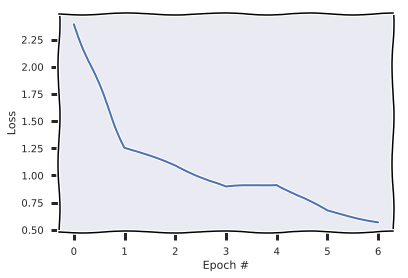

In [433]:
#Visualizing the optimization LOSS vs Epochs

losses_in_epochs = losses[0::600]
plt.xkcd()
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.plot(losses_in_epochs)
plt.show()